# 📖 TABLE OF CONTENTS

- [1. Introduction]()
- [2. Object Detection with RCNN]()
  - [1. Steps in RCNN]()
  - [2. Detailed Workflow]()
- [3. Region Proposal Generation using Selective Search Algorithm]()
  - [1. Selective Search Algorithm Workflow]()
    - [1. Generate initial sub-segmentation of input image]()
    - [2. Recursively combine the smaller similar regions into larger ones]()
    - [3. Use the segmented region proposals to generate candidate object locations]()
  - [2. Measuring Performance of Selective Search Algorithm]()
- [4. Warping Regions: Reshaping and Dilation]()
- [5. IOU (Intersection Over Union)]()
  - [1. Definition of IOU]()
  - [2. Multiple Ground Truths for same Bounding Box]()
  - [3. Reducing no of Bounding Boxes using IOU measure]()
- [6. Evolution of RCNN Architecture]()
  - [1. First RCNN Model]()
  - [2. Second RCNN Model]()
  - [3. Final RCNN Model]()
- [7. Advantages & Disadvantages of RCNN Architecture]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

We have seen that Sliding Window Technique is computationally expensive and inefficient due to the very high number of bounding box positions. Hence, in order to speed up the object detection, we have two options:

1. Use a shallow network with less no of parameters $\implies$ CNN model may not perform well
2. Reduce the no of bounding boxes
    - No need to pass bounding boxes with "Background" class (since CNN do not learn anything)
    - No need for duplicate bounding boxes for same object

**RCNN (Region-based Convolutional Neural Networks)** tries to get only the regions of image in which there is a high probability of an object. Thus, RCNN reduces the no of regions that we pass into the CNN.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Object Detection with RCNN

R-CNN (Region-based Convolutional Neural Networks) is a pioneering deep learning method for object detection that was introduced by Ross Girshick, Jeff Donahue, Trevor Darrell, and Jitendra Malik in 2014 in the paper ["Rich feature hierarchies for accurate object detection and semantic segmentation"](https://arxiv.org/abs/1311.2524). It brought significant improvements to object detection by combining region proposals with Convolutional Neural Networks (CNNs). The main idea is to generate region proposals, use a CNN to extract features from each proposal, and then classify these features into object categories or background.

## 1. Steps in RCNN

1. **Region Proposal Generation:**

    - **Selective Search:** R-CNN uses a region proposal algorithm called Selective Search to generate around 2000 region proposals (bounding boxes) from an input image. Selective Search combines the advantages of both exhaustive search and segmentation to find regions that are likely to contain objects.
    - Each of the 2000 region proposals is then warped into a fixed-size (e.g., 227x227) image patch.
    - In other words, we have
        - **Input:** Single image
        - **Process:** Region Proposal Generation by Selective Search & warp
        - **Output:** 227x227 sized 2000 region proposals

2. **Feature Extraction by Fine-tuned CNN:**

    - These patches are fed into a pre-trained CNN (like AlexNet or VGG-16) to extract a fixed-length feature vector of size 2000x4096 for each region.
    - Fine-tune CNN with warped proposals on classes of detection dataset + background class.
    - The CNN acts as a feature extractor.
    - In other words, we have
        - **Input:** 227x227 sized 2000 region proposals
        - **Process:** Feature Extraction by Fine-tuned AlexNet
        - **Output:** 2000x4096 sized feature vector

3. **Classification by Linear SVM:**

    - Train an SVM binary classifier for each class on the FC layer representation of proposals (proposal feature vectors).
    - The extracted features are then passed to this trained set of class-specific linear SVMs (Support Vector Machines) to classify each region proposal into one of the object classes or background (non-object).
    - In other words, we have
        - **Input:** 2000x4096 sized feature vector
        - **Process:** Class prediction by Linear SVM
        - **Output:** 2000 classes and confidence scores

4. **Detailed Localization by Bounding Box Regressor:**

    - Train a class specific Bounding Box Regressor on top of proposal feature vectors to predict more accurate bounding boxes for each region proposal. This step improves the localization accuracy of the detected objects.
    - In other words, we have
        - **Input:** 2000x4096 sized feature vector
        - **Process:** Bounding box coordinates transformation by Bounding Box Regressor
        - **Output:** 2000 bounding box coordinates

5. **Non-Maximum Suppression:**

    - If all 2000 bounding boxes obtained through the linear SVM model and the bounding box regressor model are displayed, too many bounding boxes may overlap for one object. This may reduce the accuracy of object detection. To solve this problem, we apply the Non-Maximum Suppression algorithm, which removes boxes in similar locations from the detected bounding boxes and selects the most appropriate box. Through the above process, overlapping boxes are removed and the minimum optimal bounding box is returned.
    - In other words, we have
        - **Input:** 2000 bounding boxes
        - **Process:** Removing unnecessary boxes with Non-Maximum Suppression
        - **Output:** Optimal bounding boxes with classes

## 2. Detailed Workflow

1. **Input Image:**

    - The process starts with an input image.

2. **Region Proposal:**

    - Use Selective Search to generate around 2000 region proposals. Each proposal is a potential region that might contain an object.

3. **Warping Regions:**

    - Each region proposal is resized to a fixed size required by the CNN (e.g., 227x227 pixels).

4. **CNN Feature Extraction:**

    - Pass each resized region proposal through a CNN. The CNN extracts high-level features from the region. The output from a fully connected layer of the CNN is used as the feature vector.

5. **Classification with SVM:**

    - Each feature vector is classified using class-specific linear SVMs. Each SVM is trained to detect a specific class, and there is an additional SVM to detect the background.

6. **Bounding Box Regression:**

    - For each classified region, a bounding box regressor adjusts the proposed bounding box coordinates to better fit the object.

7. **Non-Maximum Suppression:**
    - Non-Maximum Suppression algorithm is applied to get the minimum and optimal bounding boxes.


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Region Proposal Generation using Selective Search Algorithm

The problem of object localization is the most difficult part of object detection. One approach is that we use sliding window of different size to locate objects in the image. This approach is called Exhaustive Search. This approach is computationally very expensive as we need to search for object in thousands of windows even for small image size. Some optimization has been done such as taking window sizes in different ratios (instead of increasing it by some pixels). But even after this due to number of windows it is not very efficient.

## 1. Selective Search Algorithm Workflow

Selective Search algorithm uses both Exhaustive Search and Segmentation for generating region proposals. Its workflow is as below:

### 1. Generate initial sub-segmentation of input image

Uses the method described by *Felzenszwalb et al* in his paper "Efficient Graph-Based Image Segmentation".

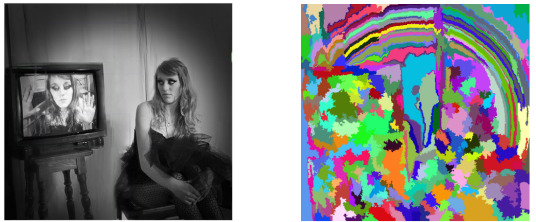

In [ ]:
# Generate initial sub-segmentation of input image

from IPython import display
display.Image("data/images/CV_08_RCNN-01.jpg")

### 2. Recursively combine the smaller similar regions into larger ones

We use Greedy algorithm to combine similar regions to make larger regions. The algorithm is written below:

1. From set of regions, choose two that are most similar.
2. Combine them into a single, larger region.
3. Repeat the above steps for multiple iterations.

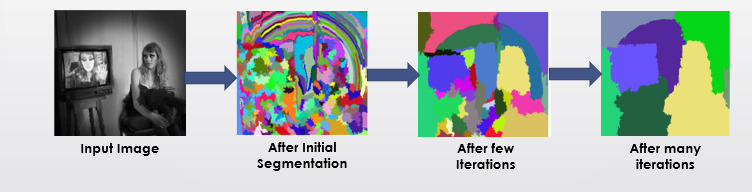

In [ ]:
# Recursively combine the smaller similar regions into larger ones

from IPython import display
display.Image("data/images/CV_08_RCNN-02.jpg")

### 3. Use the segmented region proposals to generate candidate object locations

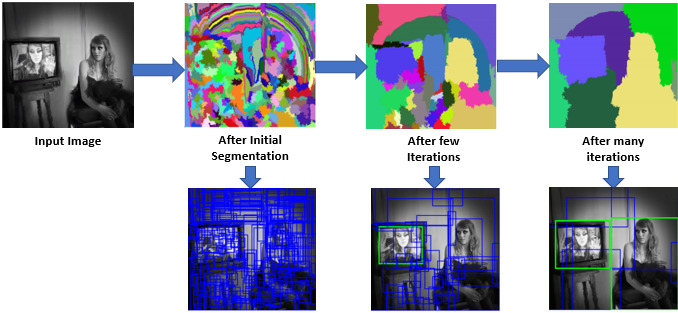

In [ ]:
# Use the segmented region proposals to generate candidate object locations

from IPython import display
display.Image("data/images/CV_08_RCNN-03.jpg")

Selective Search Algorithm is described in a nutshell in the following figure:

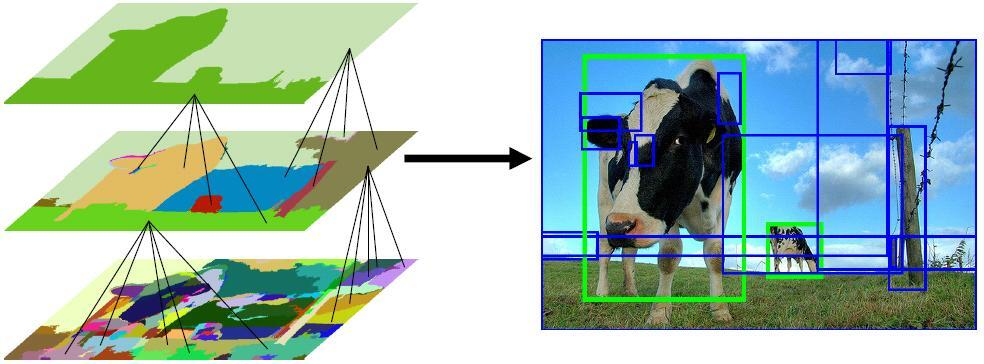

In [ ]:
# Selective Search Algorithm in a nutshell

from IPython import display
display.Image("data/images/CV_08_RCNN-04.jpg")

**Note**

The Selective Search paper considers five types of similarity when combining the initial small segmentation into larger ones. These similarities are:

1. Color Similarity
2. Texture Similarity
3. Size Similarity
4. Shape or Fill Similarity
5. Linear combination of above measures

## 2. Measuring Performance of Selective Search Algorithm

To measure the performance of Selective Search, the "Selective Search for Object Recognition" paper describes an evaluation parameter known as MABO (Mean Average Best Overlap). There are two versions of Selective Search - Fast and Quality. The difference between them is Quality Selective Search generated much more bounding boxes than Fast Selective Search and so takes more time to compute but have higher recall, ABO(Average Best Overlap) and MABO (Mean Average Best overlap).

**Note**

Selective Search is widely used in early state-of-the-art object detection architectures such as R-CNN, Fast R-CNN etc. However, it takes a lot of time to generate region proposals which is not good enough for a real-time object detection system.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Warping Regions: Reshaping and Dilation

After obtaining region proposals from the Selective Search algorithm, each proposed region (or bounding box) is processed to prepare it for feature extraction using a Convolutional Neural Network (CNN). This involves reshaping and dilation.

- **Reshaping**

    Reshaping is the process of resizing each region proposal to a fixed size required by the CNN. Here's how it works:

    1. **Variable Size Regions:** Region proposals generated by Selective Search come in various sizes and aspect ratios. However, CNNs typically require input images of a fixed size (e.g., 227x227 pixels for AlexNet).

    2. **Uniform Input Size:** To ensure that all region proposals can be fed into the CNN, each one needs to be resized to this fixed size. This process is known as reshaping. For example, a region proposal of size 150x300 pixels might be resized to 227x227 pixels.

    3. **Aspect Ratio Distortion:** During reshaping, the aspect ratio (the ratio of width to height) of the original region may be distorted. This means that an object might look stretched or squished in the resized image. While this distortion is not ideal, the CNN is trained to handle such variations to some extent.

- **Dilation**

    Dilation is a technique used to ensure that the resized region proposal captures enough context around the object. Here's how it works:

    1. **Contextual Information:** When a region proposal is tightly cropped around an object, it may miss important contextual information from the surrounding area. This context can be crucial for accurate object detection.

    2. **Padding the Region:** To address this, the region proposal can be dilated, or padded, by adding some extra pixels around the bounding box. This padding effectively enlarges the region slightly, capturing more of the surrounding area.

    3. **Maintaining Proportions:** After padding, the region proposal is then resized (reshaped) to the fixed input size required by the CNN. The additional context provided by dilation helps the CNN to better recognize and classify the object within the region.

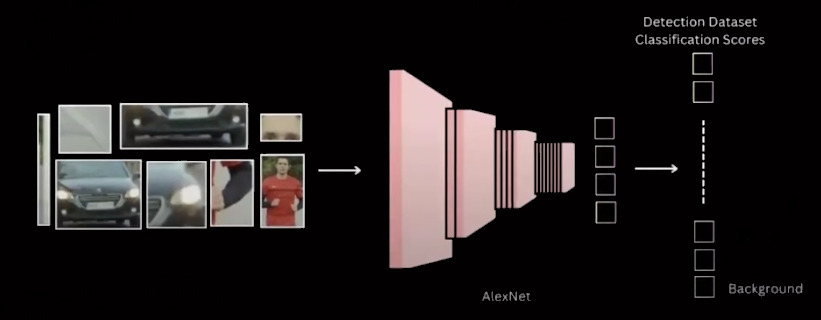

In [ ]:
# Warping Regions: Reshaping and Dilation

from IPython import display
display.Image("data/images/CV_08_RCNN-05.jpg")

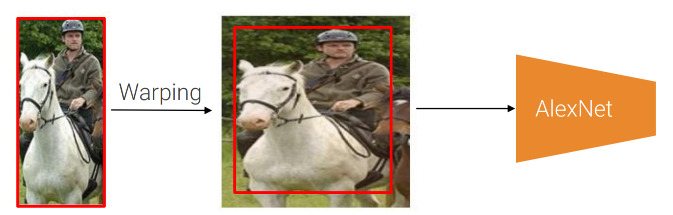

In [ ]:
# Warping Regions: Reshaping and Dilation

from IPython import display
display.Image("data/images/CV_08_RCNN-06.jpg")

Thus we now have:

- **Input:** Single image
- **Process:** Region Proposal Generation by Selective Search & warp
- **Output:** 227x227 sized 2000 region proposals

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. IOU (Intersection Over Union)

## 1. Definition of IOU

Many of the proposed regions contain partial objects. They may contain multiple partial objects too. Hence, in order to label the classes in proposed regions, we use a measure called IOU.

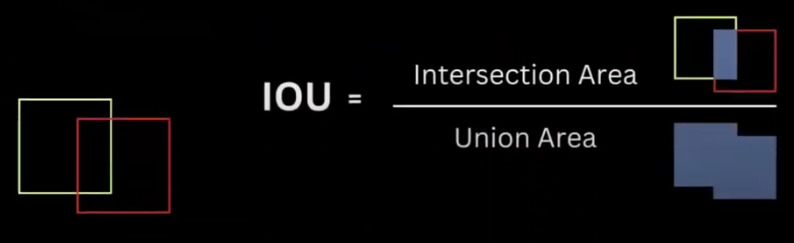

In [ ]:
# IOU

from IPython import display
display.Image("data/images/CV_08_RCNN-07.jpg")

- IOU value varies from 0 to 1
- IOU = 1 $\implies$ Both boxes are same (100 % overlap)
- IOU = 0 $\implies$ Both boxes are disjointed (0 % overlap)

## 2. Multiple Ground Truths for same Bounding Box

When there are multiple Ground Truths for same Bounding Box, we label it as the class with maximum IOU.

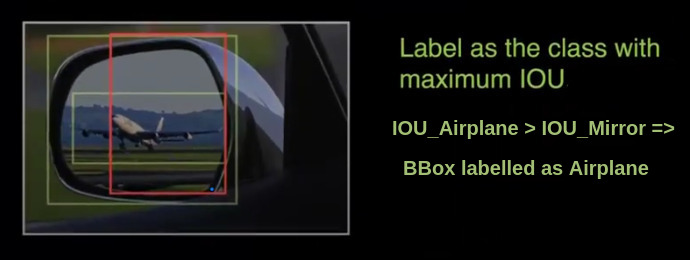

In [ ]:
# Multiple Ground Truths for same Bounding Box

from IPython import display
display.Image("data/images/CV_08_RCNN-08.jpg")

## 3. Reducing no of Bounding Boxes using IOU measure

1. Select only object bounding boxes with IOU > 0.5
2. Select some random samples of background bounding boxes with IOU < 0.3 typically
3. Combine these bounding boxes as a batch to pass to the model
4. These boxes will be warped first and then passed to the model for fine-tuning

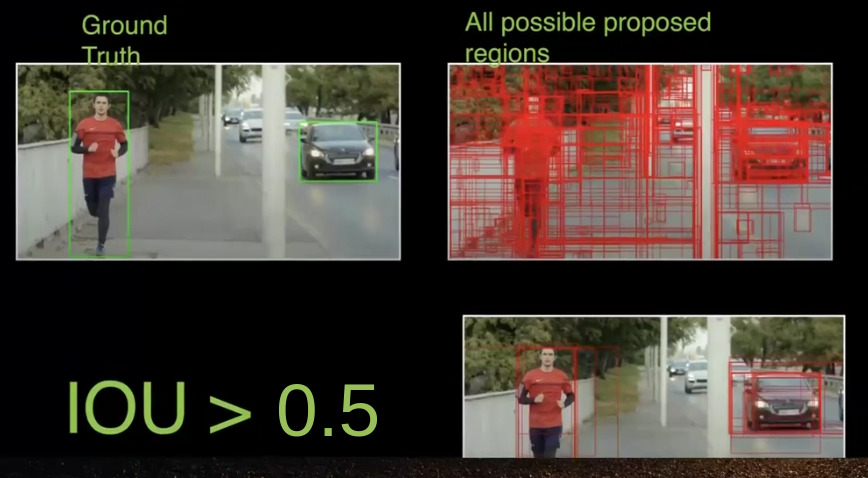

In [ ]:
# Reducing no of Bounding Boxes using IOU measure

from IPython import display
display.Image("data/images/CV_08_RCNN-09.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 6. Feature Extraction using CNN

The 227x227 sized 2000 region proposals (from Selective Search + Warping) are input into the fine-tuned AlexNet to extract a feature vector of the size of 2000 (= number of candidate regions) x 4096 (= dimension of feature vector) . The authors of the paper propose a method of fine-tuning a CNN model pre-trained through the existing ImageNet dataset to fit the domain in order to predict a class suitable for a specific domain when detecting objects. Using a fine-tuned model makes it possible to extract a more suitable feature vector for the domain.

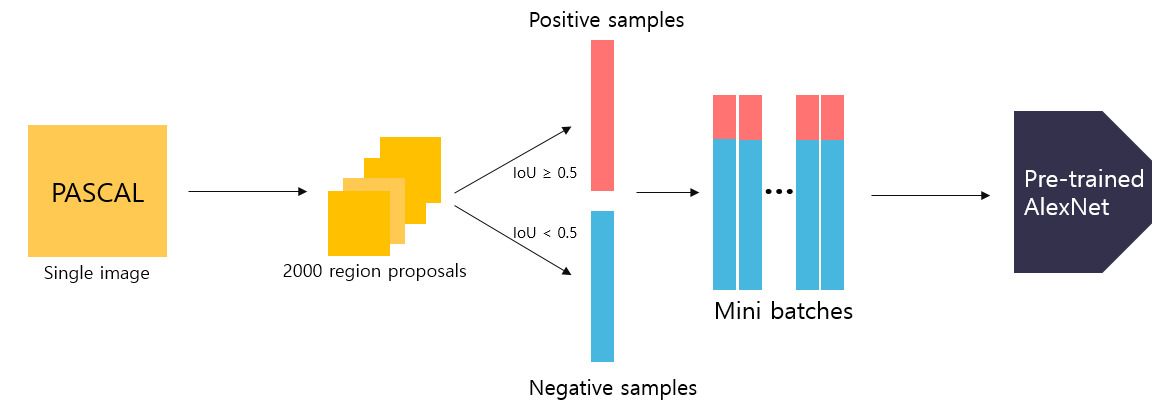

In [1]:
# Fine-tuning Pre-trained AlexNet

from IPython import display
display.Image("data/images/CV_08_RCNN-16.jpg")

The region proposal that the R-CNN model inputs during inference may include both objects and backgrounds. Therefore, when the number of objects to be predicted during fine tuning is N, the **model must be designed (no of output units = N + 1) to predict (N + 1) classes including the background, and learning data that includes both objects and backgrounds must be configured**. To this end, the Selective Search algorithm is applied to the PASCAL VOC dataset to extract candidate regions that include both objects and backgrounds, and these are used as learning data. *The Selective Search algorithm is used both during inference of the R-CNN model and when fine-tuning AlexNet*.



First, we apply the Selective search algorithm to the PASCAL VOC dataset to extract candidate regions, and calculate the IoU value between the candidate regions (i.e. bounding boxes) and the ground truth boxes. **If the IoU value is 0.5 or higher, it is saved as a positive sample (i.e. object), and if it is less than 0.5, it is saved as a negative sample (i.e. background)**. Then, we configure a 128 size mini batch with 32 positive samples and 96 negative samples and input it to the pre-trained AlexNet to proceed with learning. Using the fine-tuned AlexNet through the above process, the R-CNN model extracts feature vectors during inference.

Thus we now have:

- **Input:** 227x227 sized 2000 region proposals
- **Process:** Feature Extraction by Fine-tuned AlexNet
- **Output:** 2000x4096 sized feature vector

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 7. Classification using SVM

The Linear SVM model takes a 2000x4096 feature vector as input, predicts the class, and returns a confidence score . At this time, the **Linear SVM model is a binary classifier** that only determines whether it corresponds to a specific class. Each SVM is trained to recognize **one specific class versus all other classes (one-vs-all)**, which is a typical step for SVMs in multi-class classification tasks. Therefore, when predicting N classes, **(N+1) independent Linear SVM models including the background** must be trained. Now, let's look at the process of training a single linear SVM model as given below:

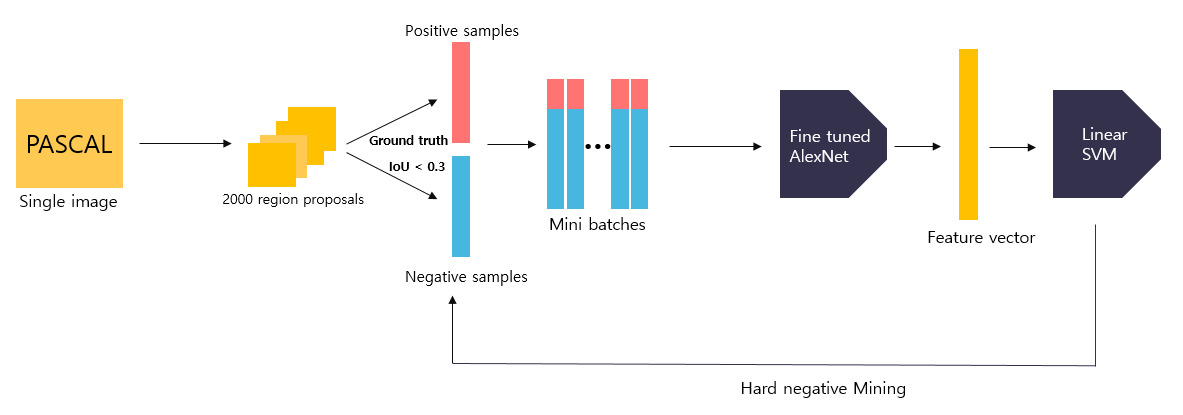

In [2]:
# Training Linear SVM using fine-tuned AlexNet

from IPython import display
display.Image("data/images/CV_08_RCNN-17.jpg")

First, to learn both objects and backgrounds, we apply the Selective Search algorithm to the PASCAL VOC dataset to extract region proposals. Unlike when fine-tuning the AlexNet model, **only the ground truth boxes are saved as positive samples, and the predicted bounding boxes with an IoU value of less than 0.3 are saved as negative samples**. Bounding boxes with an IoU value of 0.3 or more are ignored. After configuring a 128 size mini batch with 32 positive samples and 96 negative samples, we input it into the fine-tuned AlexNet to extract the feature vector, which is then input into the linear SVM for training. At this time, since one linear SVM model learns whether it corresponds to a specific class, **no of output units = 2**. After training is completed once, the **Hard Negative Mining** technique is applied to retrain.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 8. Hard Negative Mining

Hard Negative Mining is a technique used in training object detection models to improve their performance by addressing the imbalance between positive (object) and negative (non-object) samples. This imbalance occurs because, in most images, the background or non-object areas vastly outnumber the object areas. Without addressing this imbalance, the model may become biased towards predicting background more often, resulting in poor detection performance. Hard Negative Mining helps to selectively choose the most challenging negative examples, making the training process more effective.

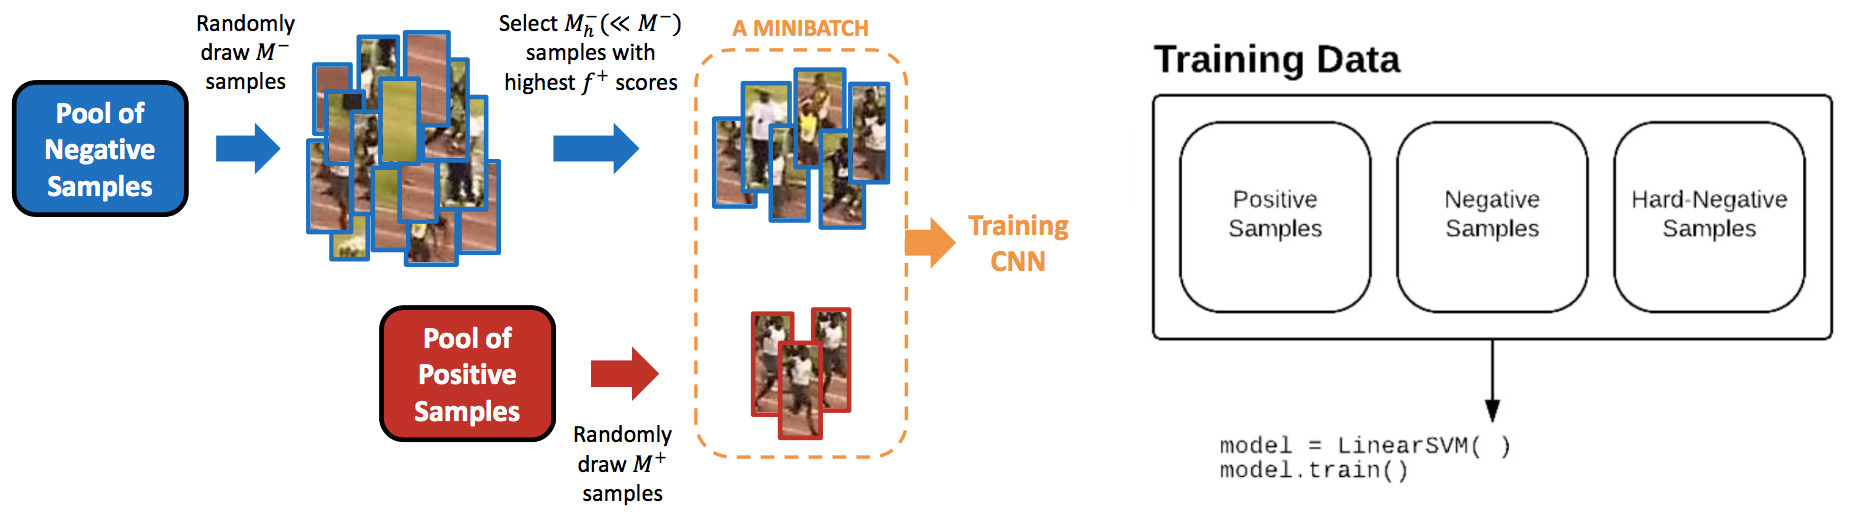

In [3]:
# Hard Negative Mining

from IPython import display
display.Image("data/images/CV_08_RCNN-18.jpg")

## 1. Detailed Explanation

1. **Imbalance in Training Data:**

    - During training, an object detection model processes a large number of background (negative) examples compared to object (positive) examples. If we train the model on all negative examples, it may learn to classify everything as background.

2. **Hard Negative Examples:**

    - Not all negative examples are equally informative. Some negative examples are easy for the model to classify correctly (e.g., a clear background with no objects), while others are hard (e.g., parts of the background that look similar to the objects).
    - Hard negative examples are those that the model currently finds difficult to classify correctly. These are the examples where the model makes incorrect predictions or assigns a high confidence score to non-object areas.

3. **Mining Hard Negatives:**

    - During the training process, instead of using all negative examples, we use a selective process to identify and focus on the hard negatives. This typically involves the following steps:
        1. **Initial Model Training:** Train the model for a few epochs using a standard approach.
        2. **Identify Hard Negatives:** Run the partially trained model on the training dataset to identify negative examples that the model misclassifies or assigns high confidence scores.
        3. **Select Hard Negatives:** Choose a subset of these hard negatives for further training.
        4. **Retrain the Model:** Retrain the model using both the positive examples and the selected hard negatives.
        5. **Iterate:** Repeat the process of identifying and selecting hard negatives periodically during training.

4. **Balancing the Data:**

    - Hard Negative Mining helps in balancing the training data by ensuring that the model is exposed to a more challenging set of negative examples, thus making it better at distinguishing between objects and non-objects.

## 2. Benefits of Hard Negative Mining

- **Improved Model Robustness:** By focusing on hard negatives, the model learns to handle difficult cases better.

- **Balanced Training:** Helps mitigate the imbalance between positive and negative examples.

- **Enhanced Detection Performance:** Leads to better precision and recall, as the model becomes adept at distinguishing between objects and similar-looking background regions.

## 3. Considerations

- **Frequency of Mining:** Deciding how often to perform hard negative mining during training can impact the effectiveness. Too frequent or too infrequent mining may not yield optimal results.

- **Thresholds for Hard Negatives:** Setting appropriate thresholds for what constitutes a hard negative is crucial. Too strict or too lenient criteria can affect the training process.

## 4. Additional Techniques

While hard negative mining is effective, it's often combined with other techniques to further improve performance:

- **Online Hard Example Mining:** This approach selects hard negatives on-the-fly during training.

- **Class Balancing:** Weighting the loss function to give more importance to underrepresented classes.

- **Focal Loss:** A loss function that downweights easy examples and focuses on hard ones.

Thus we now have:

- **Input:** 2000x4096 sized feature vector
- **Process:** Class Prediction by Linear SVM
- **Output:** 2000 classes and confidence scores

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 9. Hybrid Approach by combining CNNs for Feature Extraction and SVMs for Classification

RCNNs employ a hybrid approach by combining CNNs for feature extraction and Support Vector Machines (SVMs) for classification. Once the features are extracted, instead of using CNN for classification, RCNN uses a set of SVM classifiers to determine the object category for each region. This design choice is due to several reasons as given below:

## 1. Reasons for Using SVMs for Classification in RCNN

1. **Separation of Concerns:**

    - **Feature Extraction with CNN:** The CNN part of RCNN is used to extract high-level, rich features from the input images. CNNs are particularly good at this task due to their ability to learn complex hierarchical representations of the data.
    
    - **Classification with SVM:** Once features are extracted, SVMs are used for the classification task. SVMs are powerful classifiers known for their effectiveness in high-dimensional spaces and their robustness with limited data.

2. **Historical Context and Initial Simplicity:**

    - At the time RCNN was developed, CNNs were primarily known for their feature extraction capabilities. Integrating SVMs for classification was a practical choice since SVMs were well-understood and widely used for classification tasks.

    - The separation allowed researchers to leverage existing SVM techniques without diving into the complexities of training end-to-end deep learning models, which was less common at the time.

3. **Effective Use of Pre-trained Models:**

    - By using a pre-trained CNN on a large dataset (like ImageNet) for feature extraction, RCNN could take advantage of the powerful features learned by the CNN. These features are then fed into an SVM for classification, which benefits from the high-quality feature representation.

4. **Efficiency in Training:**

    - Training SVMs on top of pre-extracted features is computationally cheaper and faster compared to training an entire CNN end-to-end. This was particularly advantageous given the computational limitations at the time RCNN was developed.

5. **Flexibility and Modularity:**

    - Using separate components for feature extraction and classification provides modularity. The CNN can be replaced or fine-tuned independently of the SVM, offering flexibility in experimenting with different feature extractors or classifiers.

## 2. Limitations and Evolution

While the RCNN approach of using SVMs with CNNs for feature extraction had its advantages, it also had limitations:

1. **Inefficiency in Inference:**

    - The RCNN pipeline is slow because it requires running a CNN forward pass for each region proposal generated by a separate algorithm (like Selective Search). This results in significant computational redundancy.

2. **Large Storage Requirements:**

    - RCNN needs to store features for each region proposal, which consumes a lot of disk space and memory.

3. **Non-end-to-end Training:**

    - The separate training of the CNN and SVM means that the model cannot be optimized in an end-to-end fashion, potentially missing out on performance improvements that could be achieved through joint training.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 10. Detailed Localization by Bounding Box Regressor

The location of the object obtained through the selective search algorithm may be somewhat inaccurate. To solve this problem, there is a **bounding box regressor model** that converts the coordinates of the bounding box to fine-tune the location of the object.

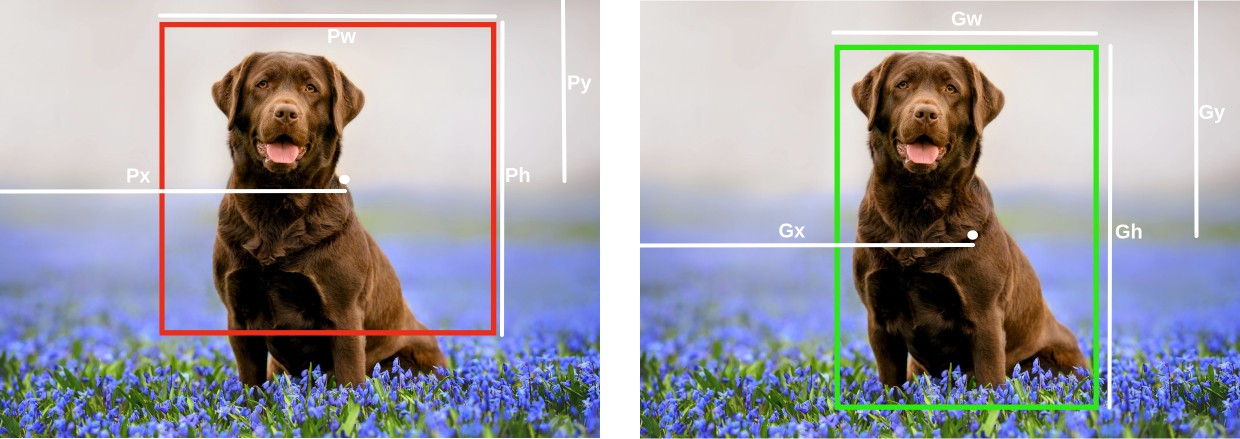

In [6]:
# Proposed Box Vs Ground Truth Box

from IPython import display
display.Image("data/images/CV_08_RCNN-19.jpg")

In the figure above, the red box is the bounding box predicted by the Selective Search algorithm and the red bounding box is the ground truth box. The Bounding Box Regressor calculates the coordinates of the predicted bounding box $(P_x, P_y, P_w, P_h)$, given the coordinates of the ground truth box $(G_x, G_y, G_w, G_h)$.

For this, we introduce a transformation given below:

- $G_x = P_w * t_x + P_x$

- $G_y = P_h * t_y + P_y$

- $G_w = P_w * exp(t_w)$

- $G_h = P_h * exp(t_h)$

Bounding Box Regressor model learns these parameters. The parameters are given by:

- $t_x = \frac {G_x - P_x}{P_w}$

- $t_y = \frac {G_y - P_y}{P_h}$

- $t_w = \log (\frac {G_w}{P_w})$

- $t_h = \log (\frac {G_h}{P_h})$

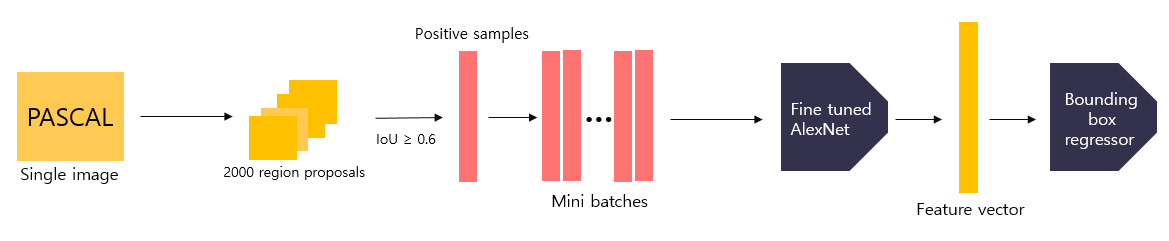

In [5]:
# Training Bounding Box Regressor using fine-tuned AlexNet

from IPython import display
display.Image("data/images/CV_08_RCNN-20.jpg")

The region proposals obtained by applying the Selective Search algorithm to the PASCAL dataset are used as training data. At this time, a separate negative sample is not defined, and **a sample with an IoU value of 0.6 or higher is defined as a positive sample**. This is because it is difficult to train the model if the IoU value is too small or there is no overlapping region. The positive sample is input to a fine-tuned AlexNet, and the obtained feature vector is input to the bounding box regressor and trained. During inference, the bounding box regressor receives the feature vector as input and returns the adjusted bounding box coordinate value (**no of output units = 4**).

- Thus, we now have
    - **Input:** 2000x4096 sized feature vector
    - **Process:** Bounding box coordinates transformation by Bounding Box Regressor
    - **Output:** 2000 bounding box coordinates

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 11. NMS (Non-Maximum Suppression)

During inference, the model may be able to find multiple bounding boxes for the same object. Non-Maximum Suppression helps avoid repeated detection of the same instance.

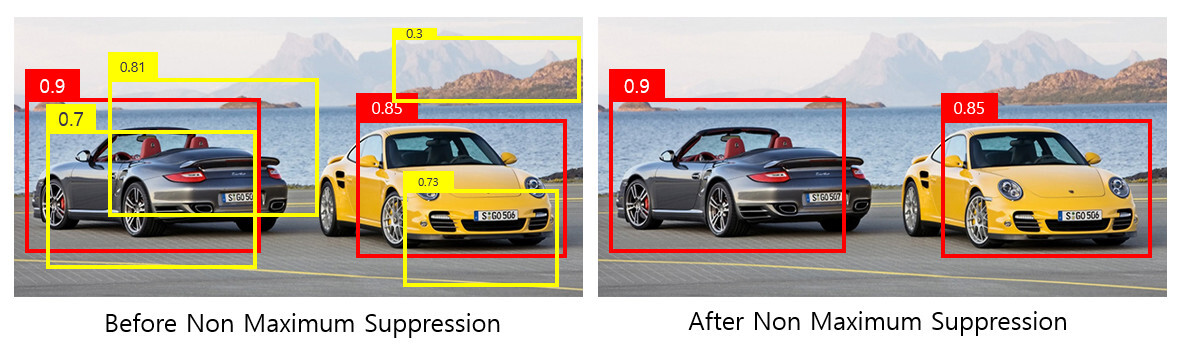

In [7]:
# Non-Maximum Suppression

from IPython import display
display.Image("data/images/CV_08_RCNN-21.jpg")

## 1. Steps for Non-Maximum Suppression

Steps for Non-Maximum Suppression are given below:

1. **Detection of Bounding Boxes:**

    - The object detection model outputs several bounding boxes for each detected object. Each bounding box is associated with a confidence score that indicates the likelihood of an object being present within the box.

2. **Sorting by Confidence Scores:**

    - The first step in NMS is to sort all the bounding boxes by their confidence scores in descending order. This means the box with the highest confidence score comes first.

3. **Selecting the Highest Confidence Bounding Box:**

    - Pick the bounding box with the highest confidence score and consider it as the current bounding box.

4. **Comparing Overlaps:**

    - For each remaining bounding box, compute the Intersection over Union (IoU) with the current bounding box.

5. **Suppressing Overlapping Boxes:**

    - If the IoU of a bounding box with the current bounding box is above a predefined threshold (usually between 0.3 to 0.5), that bounding box is considered to be redundant and is suppressed (i.e., removed from further consideration).

6. **Updating the List of Bounding Boxes:**

    - After suppressing the overlapping boxes, the process is repeated with the next bounding box in the sorted list (the one with the next highest confidence score). This box becomes the new current bounding box.

7. **Repeating the Process:**

    - Steps 4 to 6 are repeated until all bounding boxes have either been selected or suppressed.

8. **Final Set of Bounding Boxes:**

    - The remaining bounding boxes after suppression are the final set of bounding boxes that the algorithm outputs as detected objects.

## 2. Example for Non-Maximum Suppression

Lets consider the example in the above image:

1. **Remove boxes below the confidence score threshold specified for each bounding box.**
    - Set the confidence score threshold to 0.5.

    - In the figure above, remove the box with a confidence score of 0.3.

2. **Sort the remaining bounding boxes in descending order of confidence score.**
    - Sorted boxes: `[0.9, 0.85, 0.81, 0.73, 0.7]`

3. **Starting with the bounding boxes with the highest confidence score, examine the IoU values with other boxes and remove all boxes that are higher than the IoU threshold.**
    - Set IoU threshold to 0.4.
    - Investigate the IoU values between the box with confidence score 0.9 and the remaining boxes. `{0.85: 0, 0.81: 0.44, 0.73: 0, 0.7: 0.67}`
    - Remove boxes with IoU scores greater than the IoU threshold i.e. remove boxes with confidence scores 0.81 and 0.7.
    - Remaining boxes: `[0.9, 0.85, 0.73]`
    - Repeat the above process for the remaining boxes.

4. **Select only the remaining boxes.**
    - The remaining boxes are those with confidence scores of 0.9 and 0.85.

## 3. Benefits of Non-Maximum Suppression

- **Reduces Redundancy:** By suppressing overlapping boxes, NMS reduces the number of duplicate detections for the same object.

- **Improves Precision:** By retaining only the highest confidence bounding boxes, NMS helps in improving the precision of object detection.

## 4. Considerations for Non-Maximum Suppression

- **IoU Threshold:** The choice of IoU threshold is crucial. A lower threshold may result in missing objects, while a higher threshold may result in multiple detections for the same object.

- **Confidence Scores:** Accurate confidence scores are essential for NMS to work effectively. Miscalibrated scores can lead to incorrect suppression of bounding boxes.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 12. Evolution of RCNN Architecture

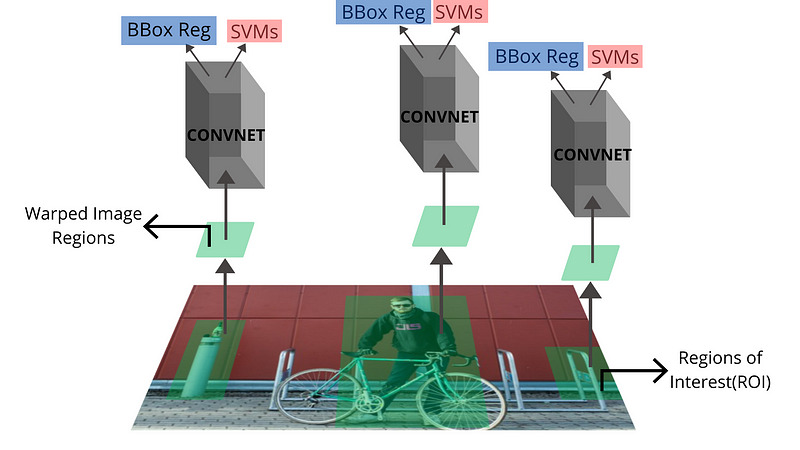

In [ ]:
# RCNN Architecture

from IPython import display
display.Image("data/images/CV_08_RCNN-10.jpg")

## 1. First RCNN Model

At first, R-CNN gave an accuracy of 44%, which was a bit low. But after a few changes, it raised to 66%. Let's look at how the accuracy was increased.

The very first architecture did not include a BBox Regressor since they thought it would be unnecessary as the input would already be a cropped image.

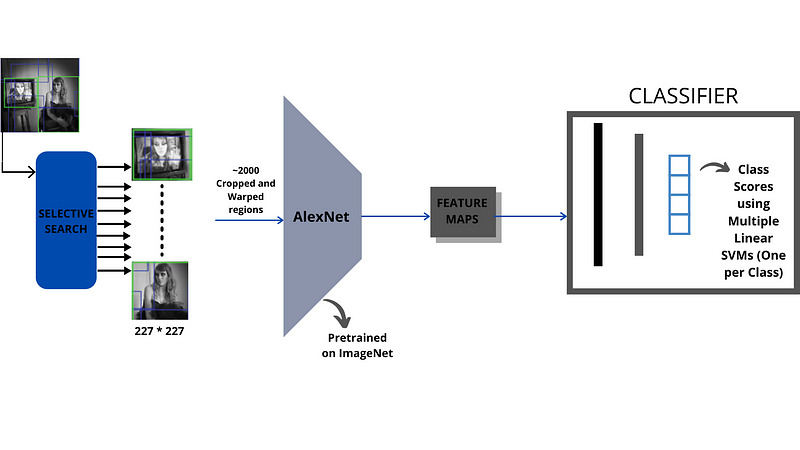

In [ ]:
# First RCNN Model

from IPython import display
display.Image("data/images/CV_08_RCNN-11.jpg")

With the above architecture, we would get an accuracy of **44.7%**. The AlexNet used is pre-trained on the ImageNet dataset which contains around 14 million images with 1000 classes. But why do we get such a low accuracy even when it is trained on such a huge dataset?

The reason here is that the images in the ImageNet dataset would be of a specific aspect ratio and the cropped and warped images the network receives from selective search has a different aspect ratio. This means that in general, the network would think that the image of a person would be tall and thin. But when we warp the region proposal to the required size, the image gets stretched and it's aspect ratio gets disturbed. This accounts for some loss of accuracy.

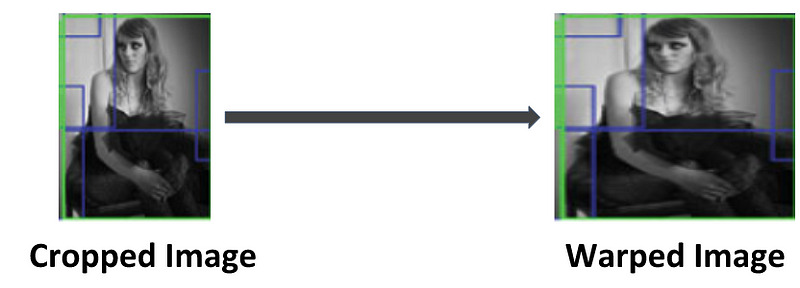

In [ ]:
# Change in Aspect Ratio after Warping

from IPython import display
display.Image("data/images/CV_08_RCNN-12.jpg")

## 2. Second RCNN Model

As discussed, you can look at the aspect ratios of both the cropped and warped images. The warped image looks stretched. In this way, the warped image looks so unnatural distorting the aspect ratio of the image. So, to counter this issue, fine-tuning of the network with region proposals is proposed. But, this training phase includes a softmax classifier instead of an SVM and the loss function would be the Cross-Entropy loss. There is one SVM allocated for one class and the SVMs are trained offline using the stored feature maps. Each SVM is trained by providing the correct and wrong proposals for that class.

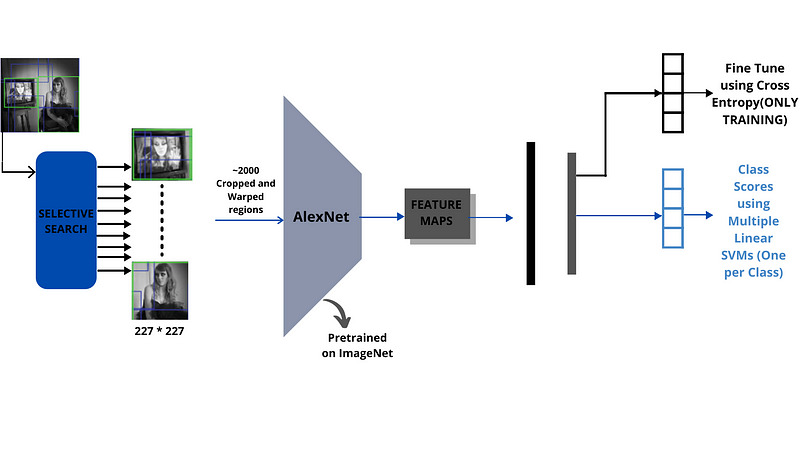

In [ ]:
# Second RCNN Model

from IPython import display
display.Image("data/images/CV_08_RCNN-13.jpg")

So, when we fine-tune the network, we update weights both in the convolution and fully connected layers. This resulted in a jump of 10% in the accuracy leading to **54.2%**.

## 3. Final RCNN Model

After the addition of fine-tuning, it is also experimentally found out that including a bounding box regressor resulted in a much better accuracy as it tightened the bounding boxes more accurately than before. It included only one fully connected layer rather than two. This resulted in a further jump of accuracy leading to **58.5%**. Using VGGNet in place of AlexNet which is much deeper led to the best performing model of R-CNN with an accuracy of **66%**.

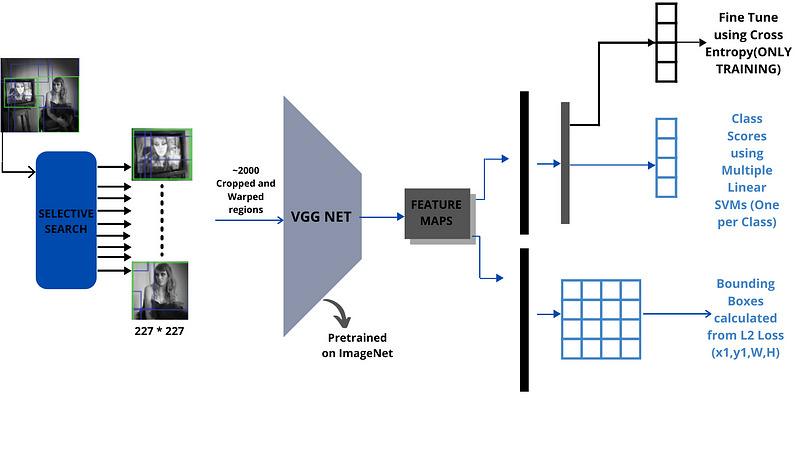

In [ ]:
# Final RCNN Model

from IPython import display
display.Image("data/images/CV_08_RCNN-14.jpg")

This is a high-level diagram of an R-CNN. Further, many improvements and experiments are done by including and removing the fully connected layers with and without fine-tuning. It is observed that while fine-tuning more number of weights were altered in the fully connected layers rather than the convolution layers which was an interesting observation.

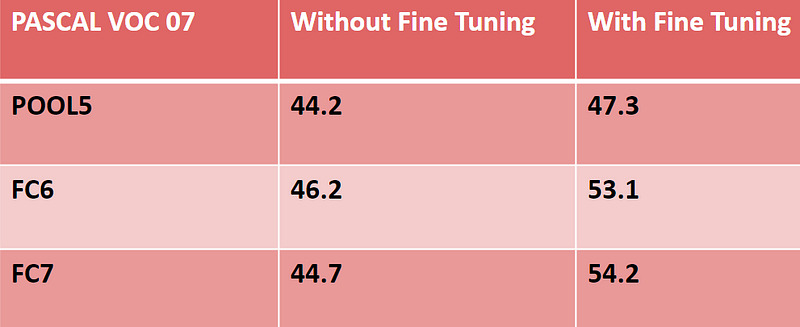

In [ ]:
# Results obtained for RCNN with AlexNet on PASCAL VOC 2007 dataset

from IPython import display
display.Image("data/images/CV_08_RCNN-15.jpg")

Without fine-tuning, there was not much difference in the accuracy even if we add the Fully Connected Layers. This shows that most of the accuracy was achieved in the convolution layers itself and the fully connected layers were hardly adding any value. This needs to be taken into account because the model size of the convolutional layers is around **3.7 MB** whereas the Fully Connected Layers need around **192 MB**. We can imagine the amount of memory we can save by excluding the FC layers. However, the story turned when we fine-tune the network with the region proposals. Most of the weights were altered in the FC layers and by this, we can see a significant rise in the accuracy. Also, if we exclude the FC7 layer we get an accuracy of 53.1% which is just 1.1% less than to the addition of it. We can consider removing this as it accounts for **29%** of the total model size. But it isn't mandatory, as one can trade-off between time, size, and accuracy. If we need a much accurate model and we have time and space, we may consider including it for critical applications such as in the medical field where accuracy is more important.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

### 2. Example for Non-Maximum Suppression

Let's consider an example with four bounding boxes and their associated confidence scores and IoU values:

- Box A: Confidence = 0.9
- Box B: Confidence = 0.8
- Box C: Confidence = 0.75
- Box D: Confidence = 0.7

Assume the IoU threshold is set to 0.5.

1. Sort by confidence: A (0.9), B (0.8), C (0.75), D (0.7).
2. Select Box A as the current box.
3. Compare IoU of B, C, D with A. If IoU of any box with A is greater than 0.5, suppress that box.
4. Suppose Box B has an IoU of 0.6 with A (suppress B), Box C has an IoU of 0.4 with A (keep C), Box D has an IoU of 0.3 with A (keep D).
5. Select the next box, which is C, and repeat the process.

### 3. Benefits of Non-Maximum Suppression

- **Reduces Redundancy:** By suppressing overlapping boxes, NMS reduces the number of duplicate detections for the same object.

- **Improves Precision:** By retaining only the highest confidence bounding boxes, NMS helps in improving the precision of object detection.

### 4. Considerations for Non-Maximum Suppression

- **IoU Threshold:** The choice of IoU threshold is crucial. A lower threshold may result in missing objects, while a higher threshold may result in multiple detections for the same object.

- **Confidence Scores:** Accurate confidence scores are essential for NMS to work effectively. Miscalibrated scores can lead to incorrect suppression of bounding boxes.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 11. Object Detection Evaluation Metrics

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 12. Advantages & Disadvantages of RCNN Architecture

- **Advantages:**
    - With R-CNN, we've avoided the usage of Sliding Window technique and Image Pyramid
- **Disadvantages:**
    - Region proposals of different sizes
    - 2000 proposals per image is too large and involves huge computation
    - It is slow at test time as it needs to run a full forward pass of CNN for each region proposal (**9 times slower** than it's previous best performing model which is **Overfeat**)
    - It has a complex multi-stage training pipeline (Cross Entropy for training the Region Proposals, Training SVMs and BBox Regressors).
- **Solution:** To address the drawbacks of R-CNN, a year later **Fast R-CNN** was proposed which is **146 times faster** than RCNN.

**Note**

Overfeat is an Object Detection model that basically involves the use of convolution operations in place of FC layers and efficiently uses the sliding window concept.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)